11


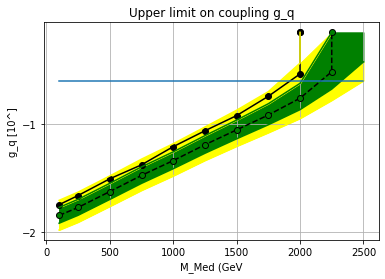

In [13]:
from ROOT import TCanvas, TPad, TFile, TPaveText, TGraphAsymmErrors, TMultiGraph
from ROOT import gBenchmark, gStyle, gROOT
import matplotlib.pyplot as plt
import numpy as np

scale = False

# Connect ROOT histogram/d demonstration file
f1 = TFile('HEPData.root')

d = gROOT.FindObject('Coupling limits on g_{q}, vector mediator')

scale_factor = (0.1)*(4)*((np.e)**2)*(0.77663)/(3**4)

grObserved = d.Get('Graph1D_y1')
grMedExp = d.Get('Graph1D_y2')
grP1SD = d.Get('Graph1D_y3')
grP2SD = d.Get('Graph1D_y4')
grM1SD = d.Get('Graph1D_y5')
grM2SD = d.Get('Graph1D_y6')

x_arrays=[]
gr_arrays=[]
y_arrays=[]
y_arrays_scaled=[]

gr_arrays.append(grObserved)
gr_arrays.append(grMedExp)
gr_arrays.append(grP1SD)
gr_arrays.append(grP2SD)
gr_arrays.append(grM1SD)
gr_arrays.append(grM2SD)

largest_array = max(len(grObserved.GetX()), len(grMedExp.GetX()), \
           len(grP1SD.GetX()), len(grP2SD.GetX()), \
           len(grM1SD.GetX()), len(grM2SD.GetX()))

largest_x = max(max(grObserved.GetX()), max(grMedExp.GetX()), \
           max(grP1SD.GetX()), max(grP2SD.GetX()), \
           max(grM1SD.GetX()), max(grM2SD.GetX()))

print(largest_array)

yvals = []
for gr_array in gr_arrays:
    for y in gr_array.GetY():
        yvals.append(y)
maxY = max(yvals)

X_Observed=[max(grObserved.GetX())]*largest_array
X_MedExp=[max(grMedExp.GetX())]*largest_array
X_P1SD=[max(grP1SD.GetX())]*largest_array
X_P2SD=[max(grP2SD.GetX())]*largest_array
X_M1SD=[max(grM1SD.GetX())]*largest_array
X_M2SD=[max(grM2SD.GetX())]*largest_array

Y_Observed=[maxY]*largest_array
Y_MedExp=[maxY]*largest_array
Y_P1SD=[maxY]*largest_array
Y_P2SD=[maxY]*largest_array
Y_M1SD=[maxY]*largest_array
Y_M2SD=[maxY]*largest_array

Y_Observed_scaled=[(maxY**2)*scale_factor]*largest_array
Y_MedExp_scaled=[(maxY**2)*scale_factor]*largest_array
Y_P1SD_scaled=[(maxY**2)*scale_factor]*largest_array
Y_P2SD_scaled=[(maxY**2)*scale_factor]*largest_array
Y_M1SD_scaled=[(maxY**2)*scale_factor]*largest_array
Y_M2SD_scaled=[(maxY**2)*scale_factor]*largest_array

x_arrays.append(X_Observed)
x_arrays.append(X_MedExp)
x_arrays.append(X_P1SD)
x_arrays.append(X_P2SD)
x_arrays.append(X_M1SD)
x_arrays.append(X_M2SD)

y_arrays.append(Y_Observed)
y_arrays.append(Y_MedExp)
y_arrays.append(Y_P1SD)
y_arrays.append(Y_P2SD)
y_arrays.append(Y_M1SD)
y_arrays.append(Y_M2SD)

y_arrays_scaled.append(Y_Observed_scaled)
y_arrays_scaled.append(Y_MedExp_scaled)
y_arrays_scaled.append(Y_P1SD_scaled)
y_arrays_scaled.append(Y_P2SD_scaled)
y_arrays_scaled.append(Y_M1SD_scaled)
y_arrays_scaled.append(Y_M2SD_scaled)

for g in range(0,len(gr_arrays)):
    for i in range(0, len(gr_arrays[g].GetX())):
        x_arrays[g][i]=gr_arrays[g].GetX()[i]
        y_arrays[g][i]=gr_arrays[g].GetY()[i]
        y_arrays_scaled[g][i]=((gr_arrays[g].GetY()[i])**2)*scale_factor


# plt.plot(X_Observed,Y_Observed, 'ko-')
# plt.plot(X_MedExp,Y_MedExp, 'ko--', markerfacecolor='green')
# plt.plot(X_P1SD,Y_P1SD, color='green')
# plt.plot(X_P2SD,Y_P2SD, color='yellow')
# plt.plot(X_M1SD,Y_M1SD, color='green')
# plt.plot(X_M2SD,Y_M2SD, color='yellow')

if scale == True:
    plt.plot(X_Observed,np.log10(Y_Observed_scaled), 'ko-')
    plt.plot(X_MedExp,np.log10(Y_MedExp_scaled), 'ko--', markerfacecolor='green')
    plt.plot(X_P1SD,np.log10(Y_P1SD_scaled), color='green')
    plt.plot(X_P2SD,np.log10(Y_P2SD_scaled), color='yellow')
    plt.plot(X_M1SD,np.log10(Y_M1SD_scaled), color='green')
    plt.plot(X_M2SD,np.log10(Y_M2SD_scaled), color='yellow')

    plt.gca().set_yticks(np.arange(-6, -2.5, 1))

    plt.gca().fill_between(X_M1SD, np.log10(Y_M1SD_scaled), np.log10(Y_P1SD_scaled), color='green')
    plt.gca().fill_between(X_M2SD, np.log10(Y_M2SD_scaled), np.log10(Y_M1SD_scaled), color='yellow')
    plt.gca().fill_between(X_P1SD, np.log10(Y_P1SD_scaled), np.log10(Y_P2SD_scaled), color='yellow')

    plt.ylabel('eps^2 * alpha(dark) * (M_d/M_med)^4 [10^]')
    plt.title('Upper (scaled) limit on coupling g_q')
else:
    plt.plot(X_Observed,np.log10(Y_Observed), 'ko-')
    plt.plot(X_MedExp,np.log10(Y_MedExp), 'ko--', markerfacecolor='green')
    plt.plot(X_P1SD,np.log10(Y_P1SD), color='green')
    plt.plot(X_P2SD,np.log10(Y_P2SD), color='yellow')
    plt.plot(X_M1SD,np.log10(Y_M1SD), color='green')
    plt.plot(X_M2SD,np.log10(Y_M2SD), color='yellow')

    plt.gca().set_yticks(np.arange(-2, -0, 1))

    gp25=[]
    for i in range(0, largest_array):
        gp25.append(np.log10(0.25))
    plt.plot(X_M2SD, gp25)

    plt.gca().fill_between(X_M1SD, np.log10(Y_M1SD), np.log10(Y_P1SD), color='green')
    plt.gca().fill_between(X_M2SD, np.log10(Y_M2SD), np.log10(Y_M1SD), color='yellow')
    plt.gca().fill_between(X_P1SD, np.log10(Y_P1SD), np.log10(Y_P2SD), color='yellow')

    plt.ylabel('g_q [10^]')
    plt.title('Upper limit on coupling g_q')




# plt.gca().set_xticks(np.arange(0, 3000, 500))
# plt.gca().set_yticks(np.arange(0, 0.4, 0.1))

# plt.gca().fill_between(X_P1SD, Y_M1SD, Y_P1SD, color='green')
# plt.gca().fill_between(X_M2SD, Y_M2SD, Y_M1SD, color='yellow')
# plt.gca().fill_between(X_P2SD, Y_P2SD, Y_P1SD, color='yellow')

plt.grid()
plt.xlabel('M_Med (GeV')
plt.show()
# plt.savefig('figoutlog', dpi = 300)

